In [381]:
import numpy as np
import sympy as sp
from sympy.plotting import plot
import matplotlib.pyplot as plt
from IPython.display import display, Latex, Math
def eq_disp(varstring, expr):
    display(Latex(f"${varstring}={sp.latex(expr)}$"))

def reduce_feedback(G_fwd, G_bwd):
    """Assumes feedback is deducted from signal, if not
    change sign of feedback"""
    return sp.simplify(G_fwd/(1+G_fwd*G_bwd))

s = sp.symbols('s')
t, zeta, omega = sp.symbols('t, zeta, omega', positive=True, real=True)

# E5.19

From the Transfer function we extract $\omega_n$ and $\zeta$

In [382]:
omega = sp.sqrt(7)
zeta = sp.Rational(3175, 1000)/2/omega
R = 1/s
T = omega**2/(s**2 + 2*zeta*omega*s + omega**2)
Y = R*T
eq_disp('Y(s)', Y)

<IPython.core.display.Latex object>

The formula for percent overshoot is:
$$\sigma_p \%=\frac{y\left(T_p\right)-y(\infty)}{y(\infty)} \times 100 \%$$
where 
$$\left.\frac{d y(t)}{d t}\right|_{t=T_p}=\left.0\right|_{(\text {first })}$$
First we must find $y(t)$

Transform to the time domain

In [383]:
y = sp.inverse_laplace_transform(Y.apart(), s, t)
eq_disp('y', y)

<IPython.core.display.Latex object>

The derivative in the laplace domain is obtained simply by multiplying by s (in case initial conditions are zero)

In [384]:
dy = sp.inverse_laplace_transform((s*Y).apart(), s, t)
eq_disp('\\frac{dy}{dt}', sp.N(dy,3))

<IPython.core.display.Latex object>

Peak time is then calculated

In [385]:
sol = sp.solve(dy.evalf(5), t)
Tp = min([x for x in sol if x != 0])
eq_disp('T_p', sp.N(Tp,3))

<IPython.core.display.Latex object>

Now the steady state value is calculated by 
$$\lim_{t\rightarrow\infty}y(t)$$

In [386]:
y_ss = sp.limit(y, t, sp.oo)
eq_disp('y(\infty)', y_ss)

<IPython.core.display.Latex object>

Finally %overshoot can be calculated

In [387]:
sigma_p = ((y.subs(t, Tp) - y_ss)/y_ss*100).evalf()
eq_disp('\\sigma_p\%', sp.N(sigma_p,3))


<IPython.core.display.Latex object>

The setling time at 2% threshold is calculated by:
$$
T_s=4 \tau=\frac{4}{\xi \omega_n}
$$

In [388]:
Ts = 4/(zeta*omega)
eq_disp('T_s', sp.N(Ts,3))

<IPython.core.display.Latex object>

## b)

To verify our results we plot $y(t)$ and anotate the plot with the peak time $T_p$ and the settling time $T_s$ 

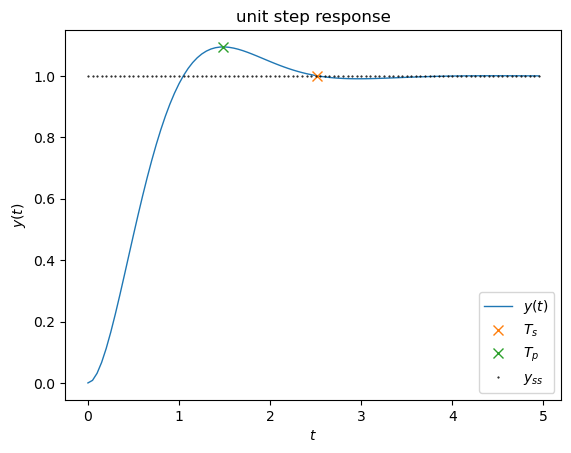

In [389]:
y_f = sp.lambdify(t, y)
tspan = np.r_[0:5:0.05]
plt.plot(tspan, y_f(tspan), linewidth=1)
plt.plot(float(Ts), y_f(float(Ts)),linestyle='None', markersize=7, marker='x')
plt.plot(float(Tp), y_f(float(Tp)),linestyle='None', markersize=7, marker='x')
plt.plot(tspan, float(y_ss)*np.ones(len(tspan)), 'k.', markersize=1)
plt.legend(['$y(t)$', '$T_s$', '$T_p$', '$y_{ss}$'])
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.title('unit step response')
plt.show()